In [128]:
import sys
sys.path.append("../../")
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
def find_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

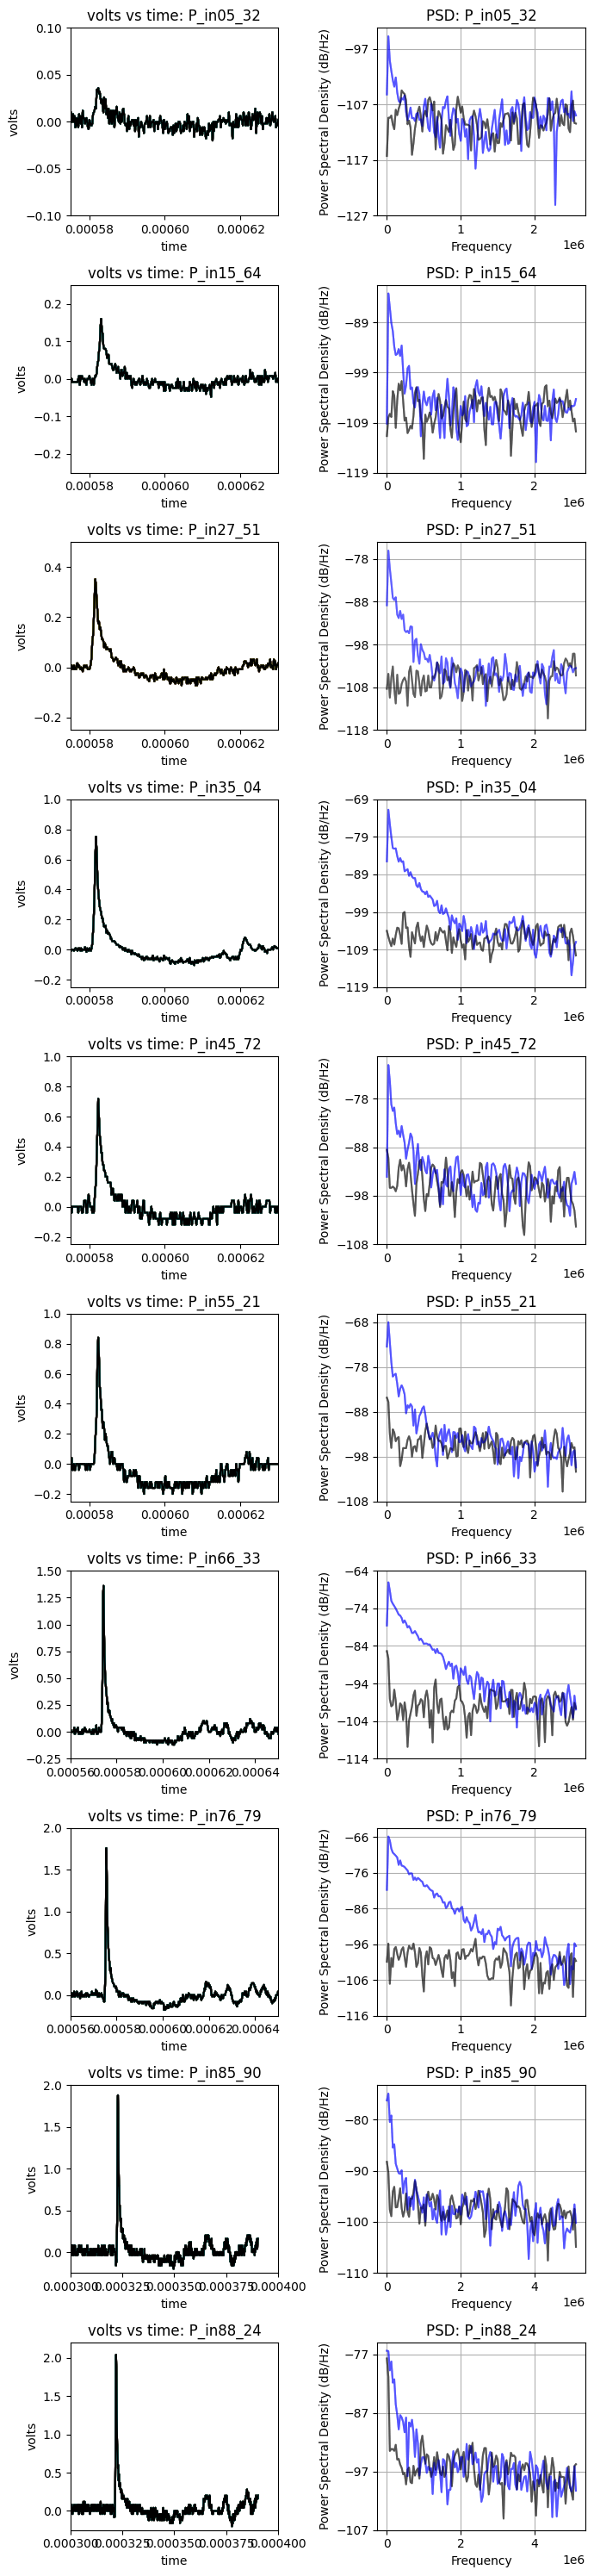

In [153]:
powers = ["P_in05_32", "P_in15_64", "P_in27_51", "P_in35_04", "P_in45_72", "P_in55_21", "P_in66_33", "P_in76_79", "P_in85_90", "P_in88_24"]
file = ["hantekWaveData71" + str(x) + ".csv" for x in range(30, 40)]
data = []
tbase = []
vbase = []
size = []
for i in range(0, len(powers)):
    d = []
    t = []
    v = []
    s = []
    for j in range(0, len(file)):
        if i != 2 or j != 0:
            d.append(np.genfromtxt("../../data/20240916/" + powers[i] + "/" + file[j], delimiter = ",")[2:-100])
            f = open("../../data/20240916/" + powers[i] + "/" + file[j], 'r')
            t.append(int(f.readline().rstrip()[10:-4]) * 1e-10)
            v.append(int(f.readline().rstrip()[11:-8]) / 100000)
            s.append(int(f.readline().rstrip()[6:]))
            d[-1][:, 0] = np.linspace(0, t[-1], s[-1])[1:-100]
        else:
            pass
    tbase.append(t)
    vbase.append(v)
    size.append(s)
    data.append(d)
fig, ax = plt.subplots(10, 2, figsize = (7, 30))
y_lims = [(-0.1, 0.1), (-0.25, 0.25), (-0.25, 0.5), (-0.25, 1), (-0.25, 1), (-0.25, 1), (-0.25, 1.5), (-0.25, 2), (-0.25, 2), (-0.25, 2.2)]
for d in range(len(data)):
    ax[d][0].set_title("volts vs time: " + powers[d])
    ax[d][0].set_xlabel("time")
    ax[d][0].set_ylabel("volts")
    ax[d][1].set_title("PSD: " + powers[d])
    ax[d][1].set_xlabel("freqs.")
    ax[d][1].set_ylabel("PSD")
    signal = []
    noise = []
    freqs = []
    for s in data[d]:
        ax[d][0].plot(s[:, 0], s[:, 1])
        if d < 6:
            sig, freqs = ax[d][1].psd(s[:, 1][find_idx(s[:, 0], 5.2e-4):find_idx(s[:, 0], 7e-4)], Fs = 4100 / np.mean(tbase[d]), NFFT = 256, c = "b", alpha = 0.1)
            n, freqs = ax[d][1].psd(s[:, 1][find_idx(s[:, 0], 3.6e-4):find_idx(s[:, 0], 5.2e-4)], Fs = 4100 / np.mean(tbase[d]), NFFT = 256, c = "k", alpha = 0.1)
        elif d < 8:
            sig, freqs = ax[d][1].psd(s[:, 1][find_idx(s[:, 0], 5.6e-4):find_idx(s[:, 0], 7e-4)], Fs = 4100 / np.mean(tbase[d]), NFFT = 256, c = "b", alpha = 0.1)
            n, freqs = ax[d][1].psd(s[:, 1][find_idx(s[:, 0], 4.2e-4):find_idx(s[:, 0], 5.6e-4)], Fs = 4100 / np.mean(tbase[d]), NFFT = 256, c = "k", alpha = 0.1)
        else:
            sig, freqs = ax[d][1].psd(s[:, 1][find_idx(s[:, 0], 3e-4):], Fs = 4100 / np.mean(tbase[d]), NFFT = 256, c = "b", alpha = 0.1)
            n, freqs = ax[d][1].psd(s[:, 1][find_idx(s[:, 0], 2e-4):find_idx(s[:, 0], 3e-4)], Fs = 4100 / np.mean(tbase[d]), NFFT = 256, c = "k", alpha = 0.1)
        ax[d][0].plot(np.mean([data[d][i][:, 0] for i in range(0, len(data[d]))], axis = 0), np.mean([data[d][i][:, 1] for i in range(0, len(data[d]))], axis = 0), c = "k")
    if d < 6:
        ax[d][0].set_xlim(0.000575, 0.00063)
    elif d < 8:
        ax[d][0].set_xlim(0.00056, 0.00065)
    else:
        ax[d][0].set_xlim(0.0003, 0.0004)
    ax[d][0].set_ylim(*y_lims[d])
plt.tight_layout()
plt.show()